# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [2]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, vector_size=10,window=3)
print(model)


Word2Vec<vocab=15, vector_size=10, alpha=0.025>


In [3]:
words = list(model.wv.key_to_index)
print(words)



['example', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'text', 'of', 'first', 'a']


In [4]:

print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.09604949  0.05007555 -0.08759888 -0.04390896 -0.00036679 -0.00297186
 -0.07661466  0.09617318  0.04981884  0.09234031]


In [5]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=15, vector_size=10, alpha=0.025>


In [6]:
X = model.wv[new_model.wv.key_to_index]

In [7]:
X.shape

(15, 10)

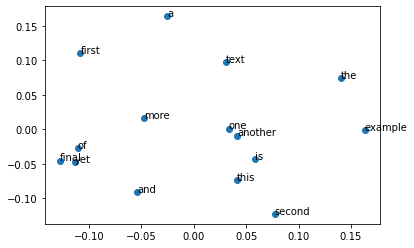

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [9]:
import gensim.downloader as api

In [10]:
corpus = api.load('text8')

In [11]:
type(corpus)


text8.Dataset

In [12]:
from gensim.models.word2vec import Word2Vec
model8= Word2Vec(corpus)

In [13]:
model8.wv['tree']

array([-1.19306338e+00,  2.14181155e-01,  3.21817398e-01, -1.72652662e+00,
       -4.26389575e-01,  1.90479249e-01, -2.74808884e+00, -1.40102470e+00,
       -2.16277289e+00, -1.68089557e+00,  1.62697732e-01, -1.59860730e+00,
        7.39329517e-01,  1.77269900e+00, -6.42141759e-01,  3.91087270e+00,
        2.75893998e+00, -7.29992986e-01,  4.59493995e-01, -2.83154488e-01,
       -4.37192053e-01, -1.41320974e-01,  1.27798128e+00, -3.14495295e-01,
        2.46689357e-02, -7.56440237e-02, -4.50565130e-01,  3.23046185e-02,
       -6.31238937e-01, -5.08498669e-01,  2.16162968e+00, -1.02348864e-01,
        3.25684607e-01, -1.96044183e+00,  8.02385926e-01,  9.55701947e-01,
        2.18008828e+00,  7.91483700e-01, -2.74191141e+00, -1.14289057e+00,
        5.98447502e-01, -1.84348571e+00, -2.48907670e-01,  9.16134834e-01,
        3.07066083e-01, -7.41554022e-01,  1.34104252e-01, -1.61724973e+00,
        8.99615765e-01, -1.28936076e+00, -4.51069266e-01,  2.04264179e-01,
        8.11668456e-01,  

In [14]:
print(model8.wv.most_similar('tree'))

[('trees', 0.7035797834396362), ('leaf', 0.7030425071716309), ('bark', 0.670143187046051), ('cave', 0.5964874029159546), ('bird', 0.5948120951652527), ('avl', 0.5943306088447571), ('fruit', 0.5895557999610901), ('leaves', 0.5759562253952026), ('nest', 0.5669060945510864), ('flower', 0.5652614235877991)]


In [15]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [16]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.6742457151412964), ('empress', 0.6361531019210815), ('princess', 0.6152475476264954)]


In [17]:
print(model8.wv.most_similar(positive=['italy', 'renault'], negative=['france'], topn=3))


[('ralf', 0.6614567637443542), ('mercedes', 0.6600911617279053), ('chevrolet', 0.6577671766281128)]


In [18]:
print(model8.wv.most_similar(positive=['france', 'venice'], negative=['italy'], topn=3))


[('toulouse', 0.7493722438812256), ('paris', 0.7297002673149109), ('bologna', 0.7227134108543396)]


In [19]:
print(model8.wv.most_similar(positive=['usa', 'beatles'], negative=['england'], topn=3))

[('dj', 0.6123205423355103), ('britney', 0.6047756671905518), ('mariah', 0.5947821140289307)]


In [20]:
model8.wv.most_similar(['apple','orange'])

[('lotus', 0.6327819228172302),
 ('jaguar', 0.6270734667778015),
 ('mcintosh', 0.6151534914970398),
 ('lynx', 0.5965717434883118),
 ('logo', 0.5928087830543518),
 ('rum', 0.5897151827812195),
 ('nes', 0.5749443769454956),
 ('juice', 0.5735470652580261),
 ('mazda', 0.5730639696121216),
 ('patch', 0.5676242709159851)]

##  Loading pre-trained models

In [21]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [22]:
print(model.most_similar('tree'))

[('trees', 0.829312264919281), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917218565940857), ('willow_tree', 0.6845874786376953), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498864173889), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547872424125671)]


In [23]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723939061164856), ('royalists', 0.45945391058921814)]


In [24]:
print(model.most_similar(positive=['italy', 'beatles'], negative=['england'], topn=3))


[('radiohead', 0.5180865526199341), ('metallica', 0.511135458946228), ('quinto', 0.5088788866996765)]


### Glove

In [12]:
# https://nlp.stanford.edu/projects/glove/

from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.42B.300d.txt'
word2vec_output_file = 'glove.42B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

<ipython-input-12-5ba44772862e>:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


OSError: [Errno 28] No space left on device

In [ ]:
from gensim.models import KeyedVectors

filename = 'glove.42B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

In [ ]:
print(model.most_similar('tree'))